# Table of content

1. [Import libraries](#imports)
2. [Data Exploration](#dataexploration)
3. [Data cleaning](#datacleaning)
4. [Data preparation](#datapreparation)

## Import libraries <a id = "imports"></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
taxi_jan_2019 = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

## Data Exploration
<a id = "dataExploration"></a>

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [7]:
taxi_data.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount'],
      dtype='object')

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

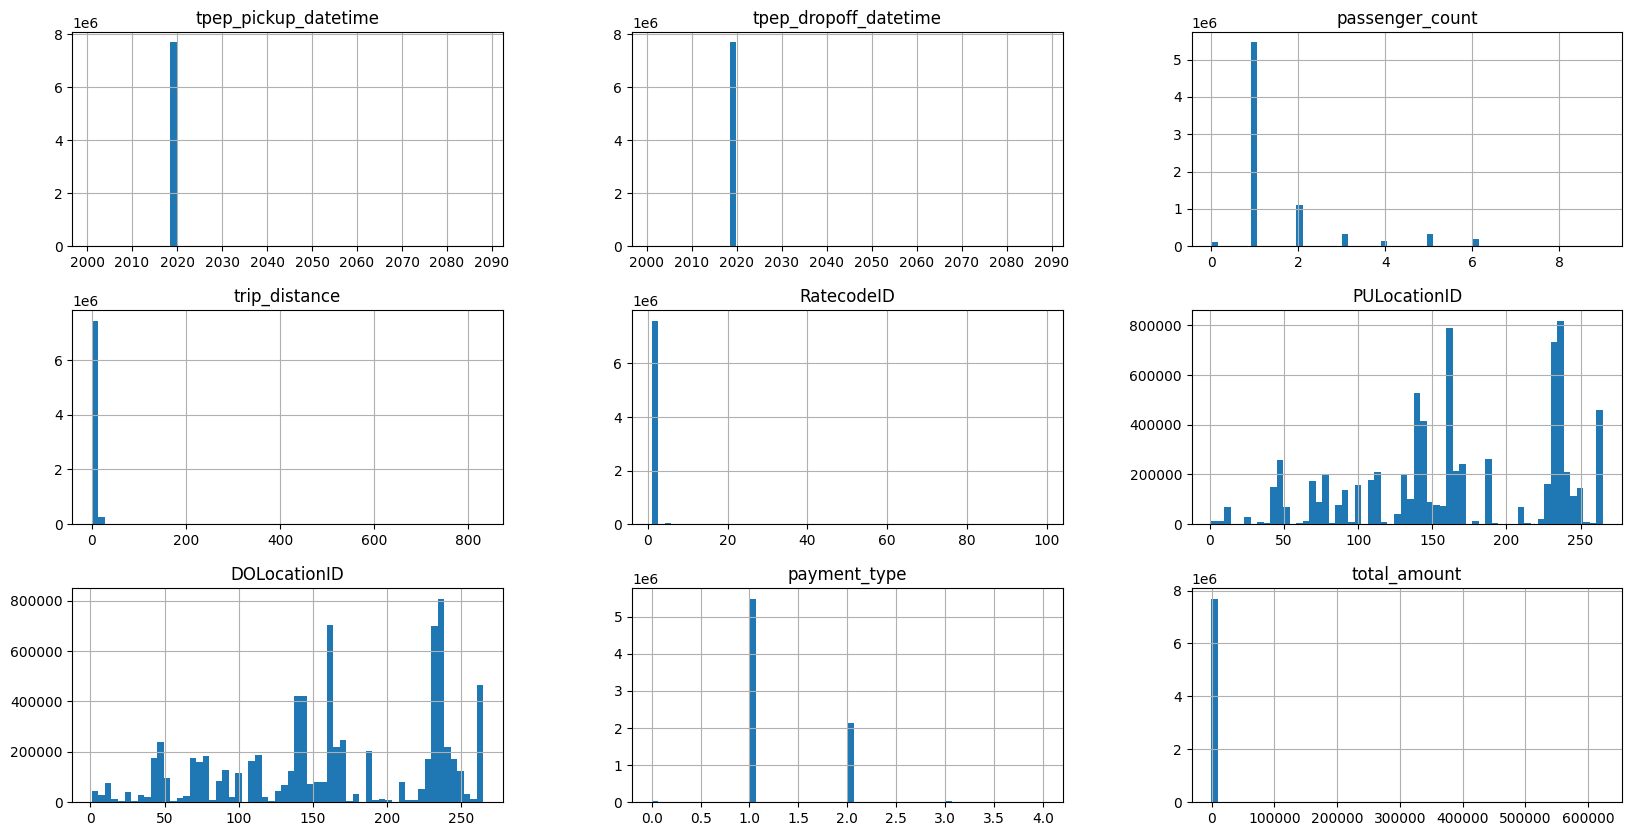

In [18]:
taxi_data.hist(figsize=(20,10), bins=60)

In [19]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

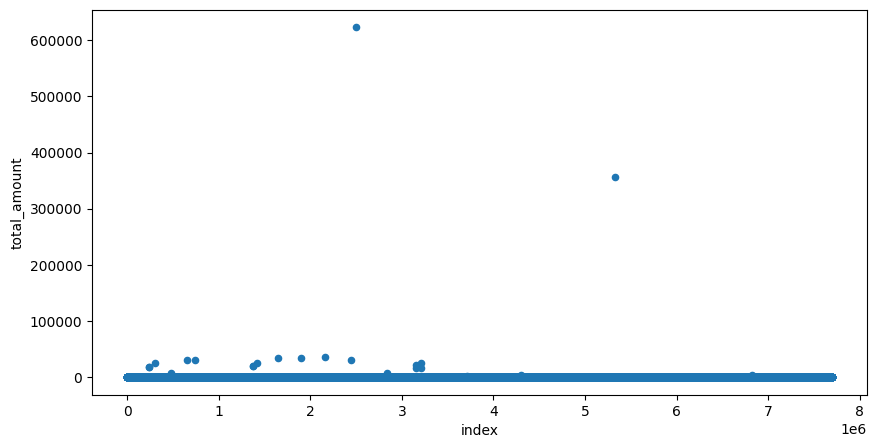

In [20]:
taxi_data.reset_index().plot(kind = "scatter", y = "total_amount", x = "index", figsize = (10,5))

<Axes: xlabel='index', ylabel='total_amount'>

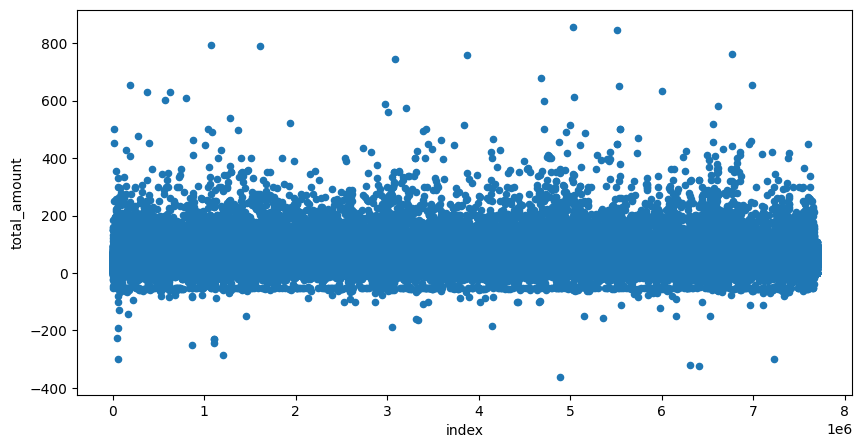

In [21]:
taxi_data[taxi_data["total_amount"]<=1000].reset_index().plot(kind = "scatter", y = "total_amount", x = "index", figsize = (10,5))

Two things to deal with: negative values and very high values. Let's first look at negative values.

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

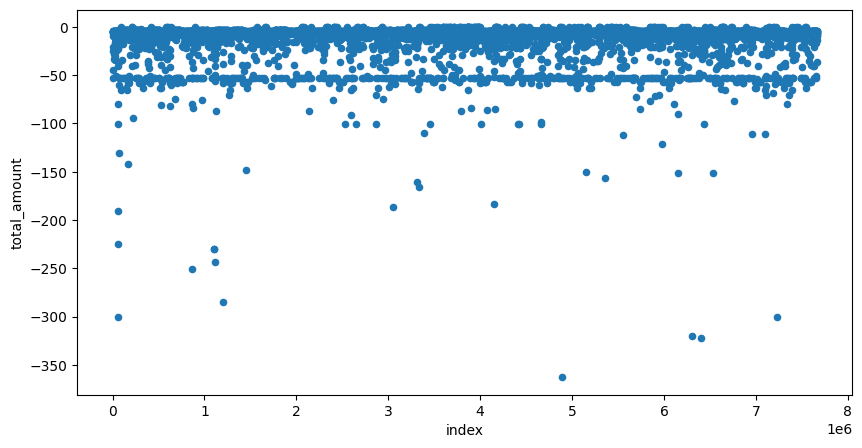

In [22]:
print(taxi_data[taxi_data["total_amount"]<0].shape)
taxi_data[taxi_data["total_amount"]<0].reset_index().plot(kind = "scatter", y = "total_amount", x = "index", figsize = (10,5))

In [23]:
taxi_data[taxi_data["total_amount"]<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [24]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

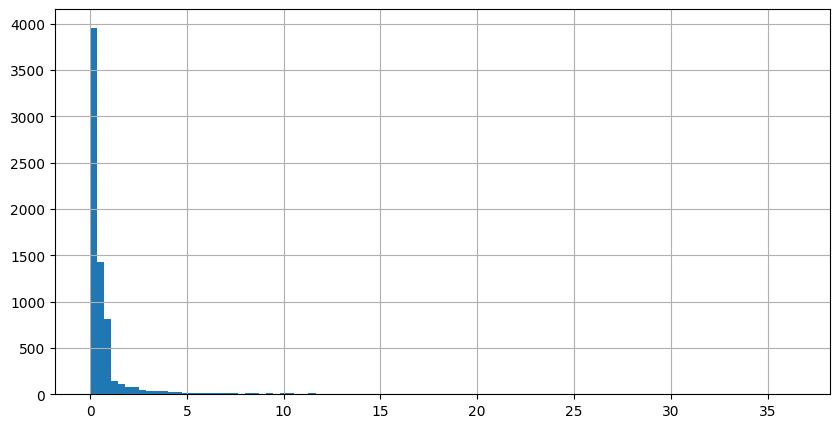

In [25]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins = 100, figsize = (10,5))

In [26]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [27]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

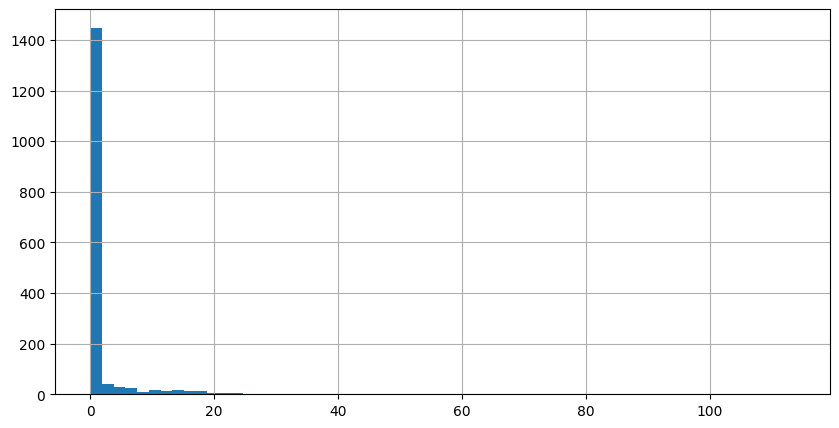

In [28]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [29]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
0.09        4
         ... 
8.11        1
14.03       1
17.94       1
10.24       1
12.30       1
Name: count, Length: 256, dtype: int64

In [30]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [31]:
taxi_data['total_amount'].mean()

np.float64(15.810651344610214)

## Data Cleaning
<a id = "datacleaning"></a>

In [8]:
#We remove record with total amount less than  and greater than 200.
taxi_data_filtered = taxi_data[(taxi_data["total_amount"]>=0) & (taxi_data["total_amount"]<200)]

In [9]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)
print(f"we got rid of {taxi_data.shape[0] - taxi_data_filtered.shape[0]} record")

(7696617, 9)
(7688319, 9)
we got rid of 8298 record


In [10]:
#Checking for missing values
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [11]:
#Replacing NaN values in passenger count with mean
##Replacing NaN values in RatecodeID with 1 as 1 means standard rate
taxi_data_filtered.loc[:, "passenger_count"] = taxi_data_filtered["passenger_count"].fillna(taxi_data_filtered["passenger_count"].mean())
taxi_data_filtered.loc[:,"RatecodeID"] = taxi_data_filtered["RatecodeID"].fillna(1)

In [12]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## Data Cleaning
<a id = "datacleaning"></a>

In [13]:
taxi_data_filtered.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [36]:
taxi_data_prepared = taxi_data_filtered.copy()

In [37]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [41]:
taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].astype('int64')
taxi_data_prepared['RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared['PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared['DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared['payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [42]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

We transormed the data into the required datatypes

In [43]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2.0,193,193,2,55.55


In [55]:
#We are adding date, day, month, year, and hour for the transaction
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
transaction_date         datetime64[ns]
transaction_day                   int32
transaction_month                 int32
transaction_year                  int32
transaction_hour                  int32
dtype: object

In [59]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_day,transaction_month,transaction_year,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1.0,151,239,1,9.95,2019-01-01,1,1,2019,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1.0,239,246,1,16.30,2019-01-01,1,1,2019,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1.0,236,236,1,5.80,2018-12-21,21,12,2018,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1.0,193,193,2,7.55,2018-11-28,28,11,2018,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2.0,193,193,2,55.55,2018-11-28,28,11,2018,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_year'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

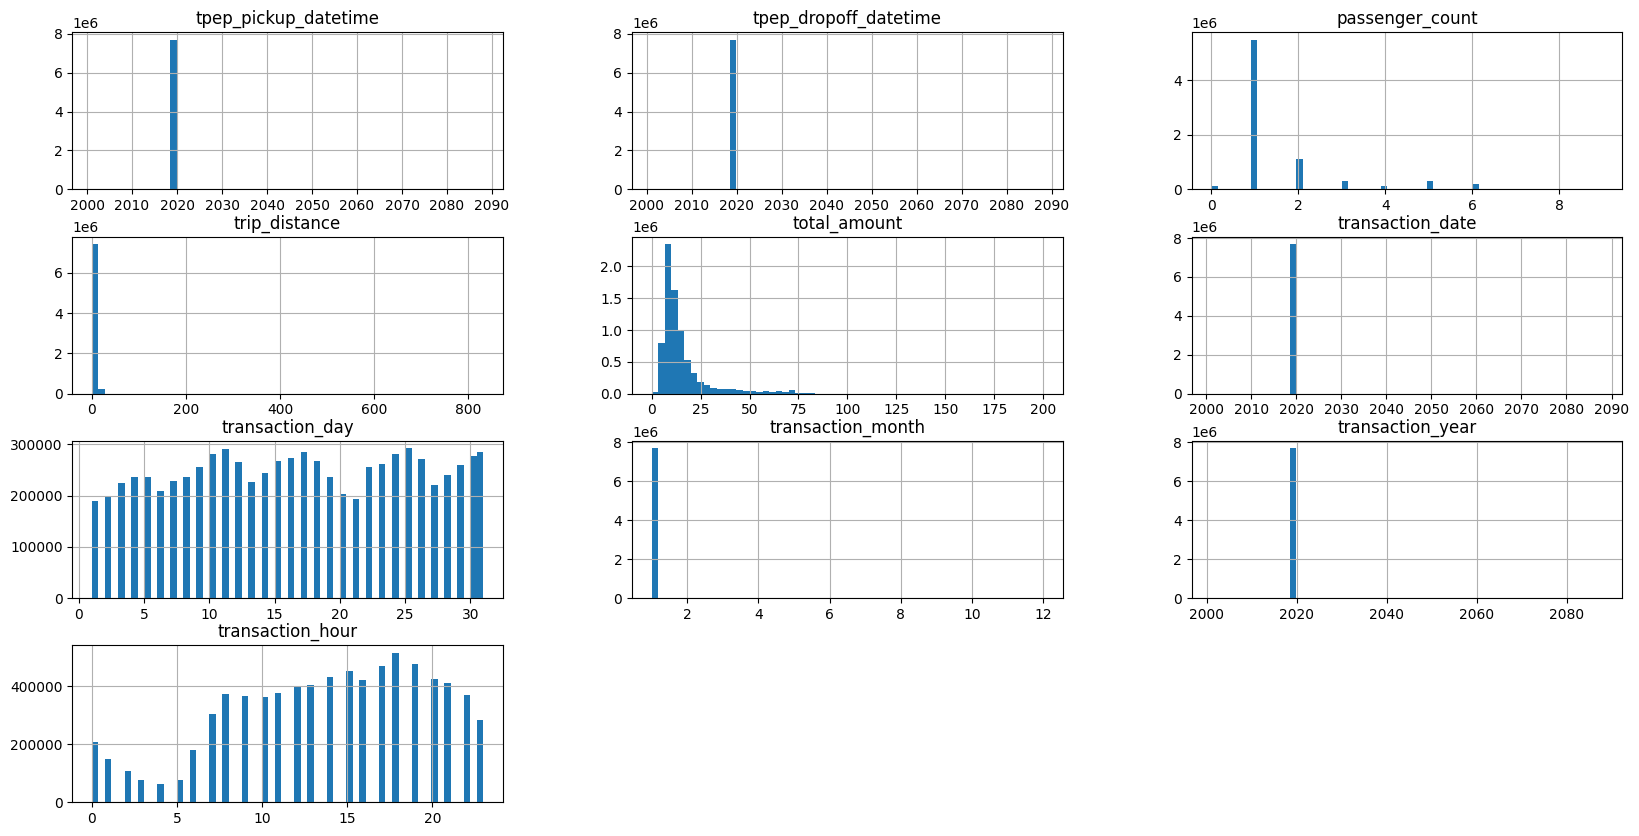

In [57]:
taxi_data_prepared.hist(bins = 60, figsize = (20,10))

In [62]:
#There are a few records with year and month not 2019 and january respectively, we must get rid of them
print(taxi_data_prepared["transaction_year"].value_counts())
print(taxi_data_prepared["transaction_month"].value_counts())

transaction_year
2019    7687877
2018        365
2009         50
2008         22
2003          2
2088          2
2001          1
Name: count, dtype: int64
transaction_month
1     7687837
12        377
2          73
11         10
4           6
7           6
3           5
6           2
5           1
8           1
9           1
Name: count, dtype: int64


In [64]:
taxi_data_prepared = taxi_data_prepared[(taxi_data_prepared['transaction_year'] == 2019) & (taxi_data_prepared['transaction_month'] == 1)]

In [66]:
#We only have data of 2019 and January month
print(taxi_data_prepared["transaction_year"].value_counts())
print(taxi_data_prepared["transaction_month"].value_counts())

transaction_year
2019    7687783
Name: count, dtype: int64
transaction_month
1    7687783
Name: count, dtype: int64


Noting down categorical and numerical columns

In [67]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [69]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7687783, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


Aggregate data points

Now is a good time to think about what we want to predict. Depending on this, we need to transform our data to have a certain format.

In [108]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102713, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


count    102713.000000
mean          4.776496
std           4.640478
min           0.000000
25%           2.049888
50%           2.960000
75%           5.618571
max         201.270000
Name: trip_distance, dtype: float64


<Axes: >

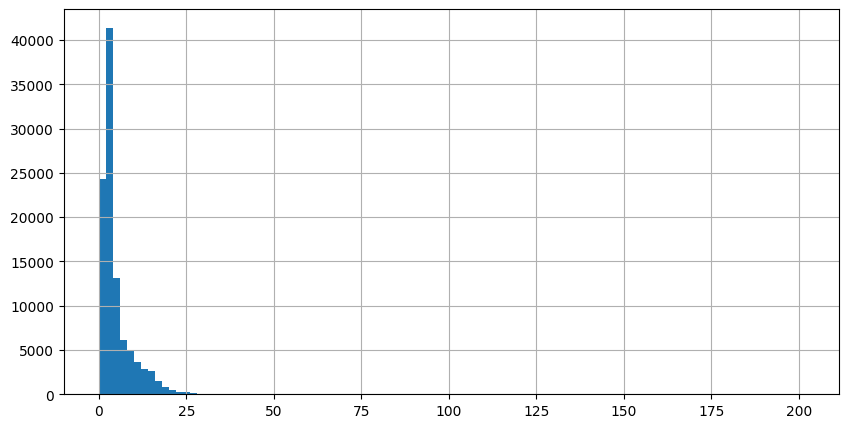

In [112]:
print(taxi_grouped_by_region['trip_distance'].describe())
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

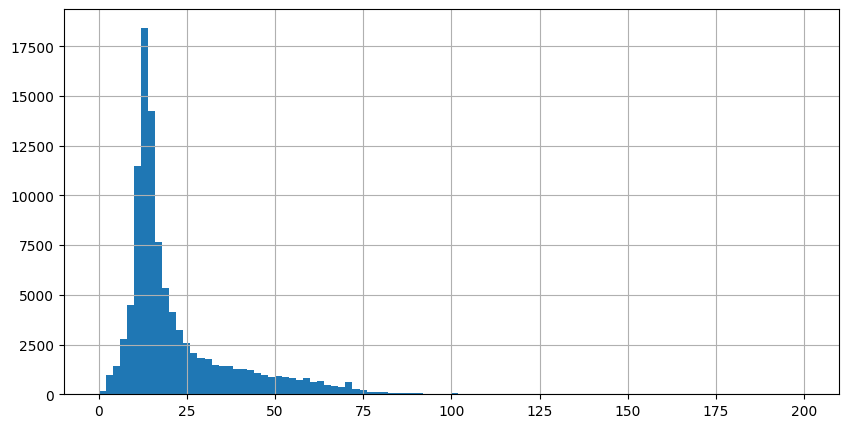

In [113]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))